In [45]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


# plot configurations
sns.set_theme(style='white')
color = sns.color_palette("Set2", 10)
color = color[1:]
sns.set_palette(palette = color)
sns.set(font_scale=2)

S = 18
plt.rcParams.update({'font.size': S,'xtick.labelsize':S, 'axes.titlesize':S})

# csv files
csv_files = os.listdir('./data')
dfs = []
measure = ['diag_mesh_0', 'diag_mesh_1', 'max', 'mean']
measure = ['diag_mesh_0', 'diag_mesh_1', 'max', 'mean','MaxDiagRatio']
measure = ['diag_mesh_0', 'max', 'mean','MaxDiagRatio']


# helper function
def get_res(csv_files = csv_files, M = 'white'):
    idx = 0
    tmp = []
    for i in csv_files:
        if i[0] != '.':
            df = pd.read_csv('./data/' + i)
            a, b, c = i[:-4].split('_')
            df['lr'] = a
            df['wp'] = b
            df['model'] = c
            df['MaxDiagRatio'] = df['max'] / df['diag_mesh_0']
            if a=='lh' and b == M:
                tmp.append(df)
    res = pd.concat(tmp)
    res.replace({'vox2cortex':'Vox2Cortex','deepcsr':"DeepCSR",
                 'corticalflow':"CorticalFlow",'topofit':"Topofit",
                'cortexode':"CortexODE",'pialnn':"PialNN"},inplace=True)
    res.sort_values(by='model',inplace=True)
    return res

def plot(res,submodel,alpha=0.6):
    i = 1
#     plt.figure(figsize=(20,10))
    fig, axs = plt.subplots(nrows = 1, ncols=4)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    plt.suptitle('Distance measurement of models for lh {}'.format(submodel))
    for m in measure:
        plt.subplot(1,4,i)
        ax = sns.stripplot(data=res, x=m, y=res['model'],alpha=alpha, ax = axs[i-1])
        if i > 3:
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylabel('')
        if i > 3:
            ax.set_xscale('log')
        if i == 1:
            ax.set_xlabel('Diag distance of \ntruth mesh (mm)')
        if i == 4:
            ax.set_xlabel('Ratio of max over diag \ndistance of mesh')

        if i == 2:
            ax.set_xlabel('Max distance between\ntruth and predicted (mm)')
        if i == 3:
            ax.set_xlabel('Mean distance between\ntruth and predicted (mm)') 
        if i > 1:
            ax.set_yticks([])
            
        i += 1
    fig.align_xlabels(axs)
    plt.savefig('lh_{}.png'.format(submodel),dpi=300)
    plt.savefig('distance_{}.svg'.format(submodel), format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

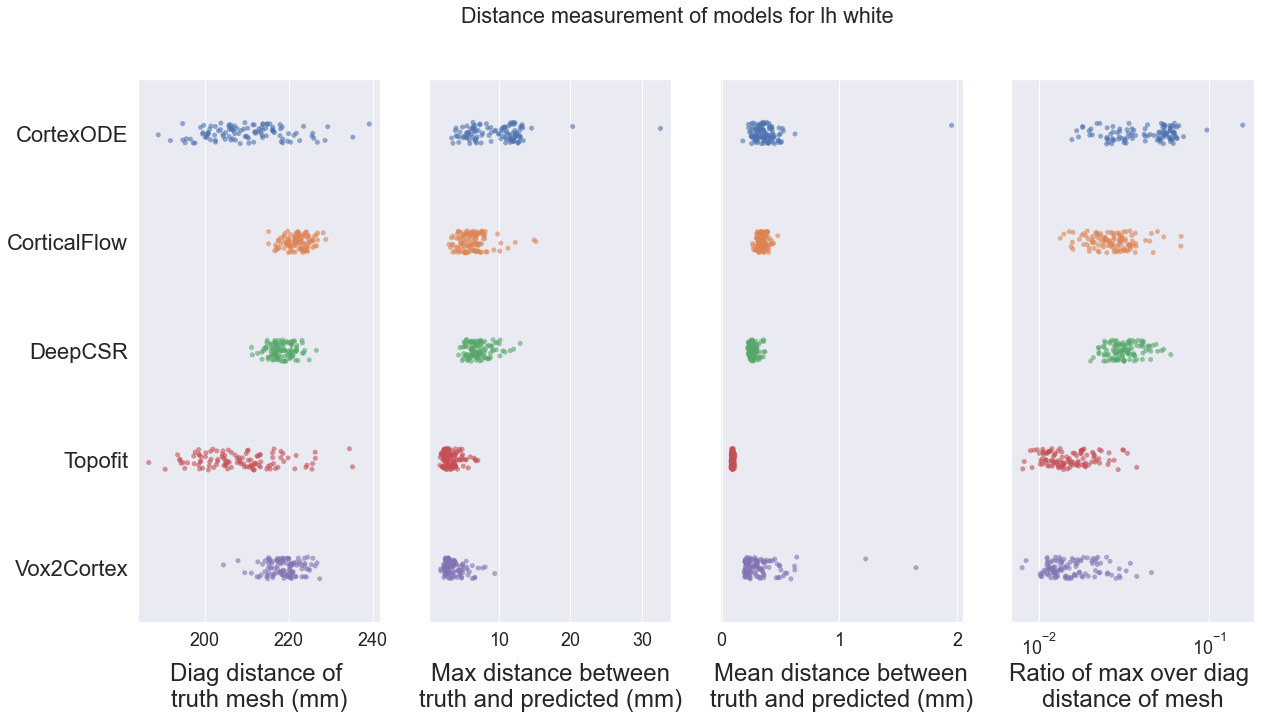

In [46]:
# run
plot(get_res(M = 'white'),'white')

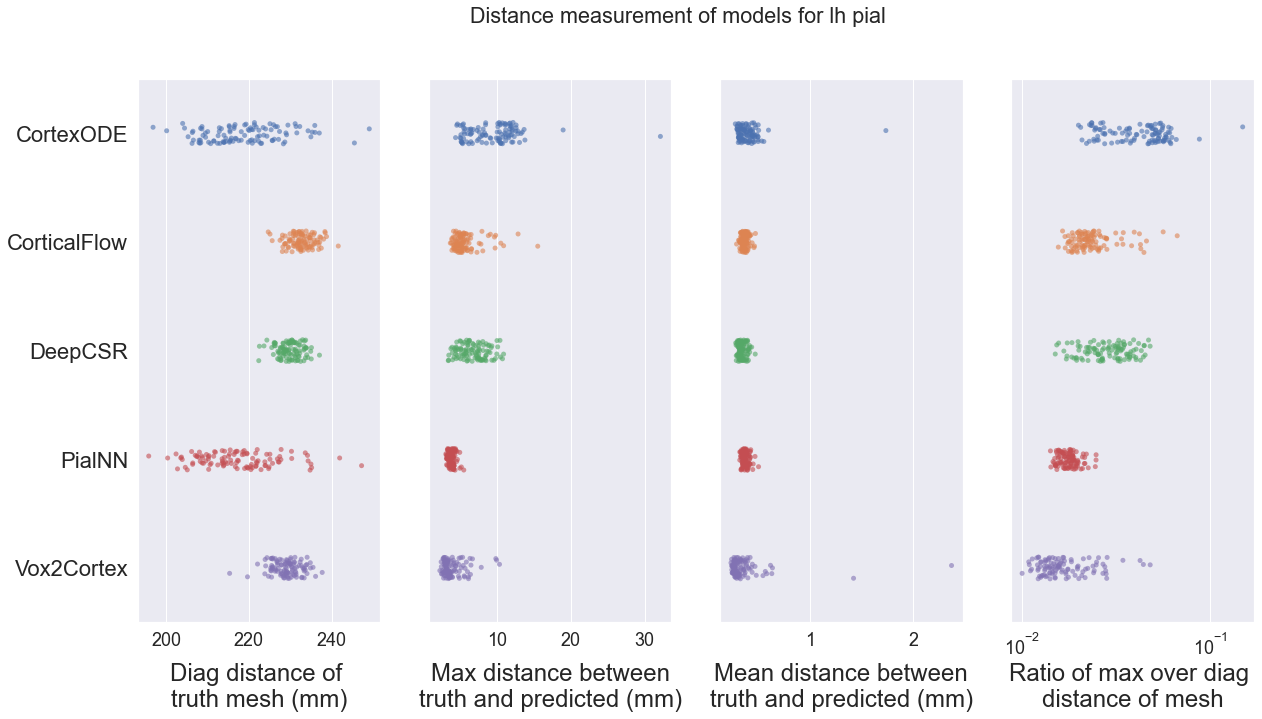

In [47]:
M = 'pial'
plot(get_res(M = M),M)

In [87]:
res = pd.concat(tmp2)
i = 1
plt.figure(figsize=(20,35))
plt.suptitle('distance measurement of models for lh pial')
for m in measure:
    plt.subplot(3,2,i)
    ax = sns.stripplot(data=res, x=m, y=res['model'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    i += 1
    
plt.savefig('lh_pial.png', dpi=300)

NameError: name 'tmp2' is not defined

In [25]:
for d in dfs:
    print(dfs['lr'])

,RMS,diag_mesh_0,diag_mesh_1,max,mean,min,n_samples,lr,wp,model
0,0.378283,220.569290,224.103123,3.617059,0.285551,0.000009,42016,lh,white,vox2cortex
1,0.405557,218.020065,222.032676,4.527124,0.305599,0.000013,42016,lh,white,vox2cortex
2,0.300380,220.462875,223.081123,2.462091,0.232752,0.000020,42016,lh,white,vox2cortex
3,0.414873,221.573288,223.163431,6.568906,0.296200,0.000042,42016,lh,white,vox2cortex
4,0.295101,214.291641,216.879727,3.700929,0.221769,0.000007,42016,lh,white,vox2cortex
...,...,...,...,...,...,...,...,...,...,...
102,0.284524,217.386276,220.678192,2.488166,0.202496,0.000007,42016,lh,white,vox2cortex
103,0.285177,220.289627,223.446148,2.454958,0.208248,0.000011,42016,lh,white,vox2cortex
104,0.482481,220.662384,220.876964,2.999519,0.410051,0.000072,42016,lh,white,vox2cortex
105,0.505611,225.729355,225.902228,2.785346,0.434437,0.000034,42016,lh,white,vox2cortex


In [33]:
keys = list(dfs[6].columns)

In [36]:
for d in dfs:
    print(list(d.columns))

['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'folder', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'folder', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'max', 'mean', 'min', 'n_samples', 'lr', 'wp', 'model']
['RMS', 'diag_mesh_0', 'diag_mesh_1', 'm

In [35]:
df = pd.DataFrame()

for d in dfs:
    df = pd.merge(df, d, on = keys)

KeyError: 'RMS'

In [11]:
for k in dfs[1:]:
    print(k)
    dfs[k]
    break

TypeError: unhashable type: 'slice'

In [10]:
dfs['lh_white_vox2cortex.csv']

,RMS,diag_mesh_0,diag_mesh_1,max,mean,min,n_samples
0,0.378283,220.569290,224.103123,3.617059,0.285551,0.000009,42016
1,0.405557,218.020065,222.032676,4.527124,0.305599,0.000013,42016
2,0.300380,220.462875,223.081123,2.462091,0.232752,0.000020,42016
3,0.414873,221.573288,223.163431,6.568906,0.296200,0.000042,42016
4,0.295101,214.291641,216.879727,3.700929,0.221769,0.000007,42016
...,...,...,...,...,...,...,...
102,0.284524,217.386276,220.678192,2.488166,0.202496,0.000007,42016
103,0.285177,220.289627,223.446148,2.454958,0.208248,0.000011,42016
104,0.482481,220.662384,220.876964,2.999519,0.410051,0.000072,42016
105,0.505611,225.729355,225.902228,2.785346,0.434437,0.000034,42016


In [35]:
def plot_distance_measurements(file1 = 'w_distance.csv', file2 = 'p_distance.csv',alpha=0.6):
    df = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    cols = list(df.columns)[:6]
    idx = 1
    plt.figure(figsize=(12,10))
    plt.suptitle('Hausdorff Distance statistics of 107 samples lh model for CorticalFlow',fontsize=15)
    for c in cols:
        plt.subplot(2,3,idx)
        plt.hist(df[c],alpha=alpha)
        plt.hist(df2[c],alpha=alpha)
        plt.title(c)
        plt.ylabel('Count')
        plt.xlabel('Distance')
        idx += 1
        plt.legend(['white model','pial model'])
    plt.savefig('distance.png',dpi=300)


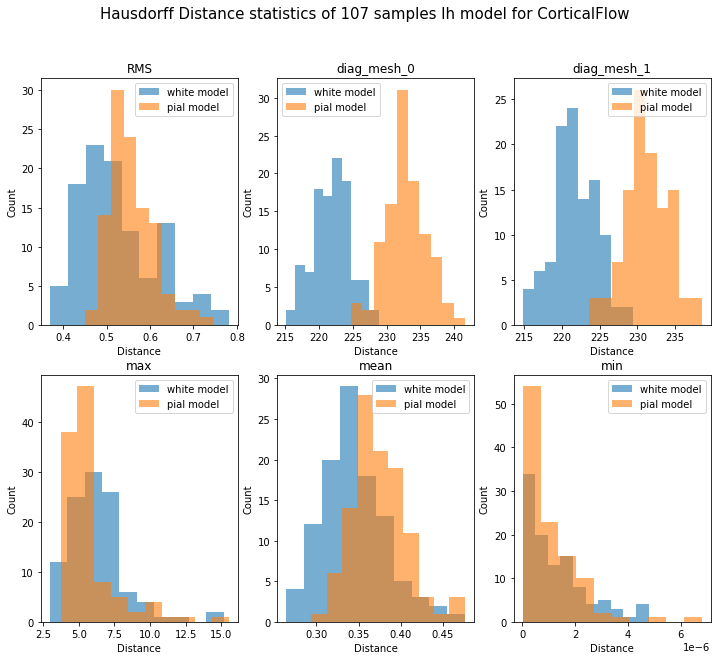

In [36]:
plot_distance_measurements()
